In [1]:
import numpy
import scipy
import sklearn
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [1]:
import json
# import csv
import unicodecsv as csv

with open('Input.json') as data_file:
    data = json.loads(data_file.read())

In [2]:
data

{'InputPath': ['C:/Development/TradingSystemDev/FolderWithInputFiles'],
 'TradeSplitterFiles': ['Trades_Calculation_0m-3m',
  'Trades_Calculation_0m-6m',
  'Trades_Calculation_0m-12m'],
 'OutputPath': 'C:/Development/TradingSystemDev/FolderWithOutputFiles/',
 'DataFrameFilters': [{'EntrySeconds': 'Maximum', 'Maximum': '420'},
  {'PositionType': 'Equals', 'Equals': 'Short'},
  {'Float': 'MinimumMaximum', 'Minimum': '0', 'Maximum': '500000000'},
  {'EntryPrice': 'MinimumMaximum', 'Minimum': '20', 'Maximum': '180'}],
 'DependentVariable_Classification': 'WinTrade',
 'DependentVariable_Regression': 'PercentageProfit',
 'IndependentVariables': 'EntrySeconds,Float,Vol1MinRatioMaxPD123,Vol1MinRatioMaxPD123_TotalVolume,AllExchangesVolume,IntradayCurrentMarketGapPerc,Fund52WeekChange,FundShortRatio,FundShortPercofFloat',
 'OptimizationParameter': 'Sum(NetProfit)'}

In [2]:
data = pd.read_csv('Trades_Calculation_0m-12m.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (116,117,129,137,141,146,162,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(data.head(6))

  Symbol PositionType  Size  EntryDate  ExitDate     EntryTime      ExitTime  \
0     MU         Long  1000   20180601  20180601  09:30:25.511  09:31:00.124   
1    SLS         Long  1000   20180601  20180601  09:30:15.393  09:31:13.318   
2     MU        Short -1000   20180601  20180601  09:31:44.187  09:32:26.567   
3     MU        Short -1000   20180601  20180601  09:31:32.263  09:32:51.307   
4     MU        Short -1000   20180601  20180601  09:31:32.263  09:32:51.307   
5     MU        Short -1000   20180601  20180601  09:31:53.385  09:32:51.307   

          TradeTime  EntryPrice  ExitPrice  ...    GP  IH_PH  IL_PL  \
0  00:00:34.6125240       58.90     58.918  ...  GpUp     PH     PL   
1  00:00:57.9251340        6.95      6.350  ...  GpUp     IH     PL   
2  00:00:42.3794710       58.55     58.546  ...  GpUp     PH     PL   
3  00:01:19.0436280       58.67     58.668  ...  GpUp     PH     PL   
4  00:01:19.0436280       58.67     58.668  ...  GpUp     PH     PL   
5  00:00:57.9

In [4]:
#Available data

for i in range(len(data.columns)):
    print(data.columns[i])

Symbol
PositionType
Size
EntryDate
ExitDate
EntryTime
ExitTime
TradeTime
EntryPrice
ExitPrice
NetProfit
PercentageProfit
WinTrade
LossTrade
EntrySignal
ExitSignal
EntryCost
ExitCost
MFEPrice
MAEPrice
MFE
MAE
MfeMaeRatio
MFEPercentage
MAEPercentage
MFEFirst
MAEFirst
MFETime
MAETime
IntradayDrawDown
IntradayDrawDownTime
PeakNetProfit
PeakNetProfitTime
StrategyID
DayOfWeek
DayOfMonth
EntryNumber
Vol1MinRatioMaxPD123
Vol1MinRatioMaxPD123_TotalVolume
Vol1MinRatioMaxPD123_Volume
Vol1MinRatioMaxPD123_Time
Vol1Min
PreMarketVolume
AllExchangesVolume
Float
PreMarketCurrentGap
PreMarketCurrentGapPerc
PreMarketOpenGapPerc
PreMarketMaxGapUpPerc
PreMarketMaxGapDnPerc
IntradayCurrentMarketGapPerc
CurrentGapPercToPreMarketMaxGapUpPercRatio
CurrentGapPercToPreMarketMaxGapDnPercRatio
IntradayMarketGapPerc
IntradayMarketMaxGapUpPerc
IntradayMarketMaxGapDnPerc
Current_Vol_1Min_PD_Av_1_2_3_10Bars_Ratio
Current_Vol_1Min_PD_Av_2_3_10Bars_Ratio
Current_Vol_1Min_PD_Av_1_10Bars_Ratio
Current_Vol_1Min_PD_Av_1_2_

# Data PrePocessing

In [5]:
def equals(d,keys,values):
    return d[d[keys]==values]

In [6]:
d1=equals(data,'PositionType','Short')

In [7]:
def between(d,key,v1,v2):
    return d.query("'"+str(v1)<=key<=str(v2)+"'")

In [8]:
"'"+str(5)<='key'<=str(2)+"'"

False

In [9]:
#d1=between(d1,'EntrySeconds',0,420)

In [10]:
d1=d1[d1.Float<= 500000000]

In [11]:
d1=d1.query('20<=EntryPrice<=180')

In [12]:
d1=d1.query('0<=EntrySeconds<=420')

In [13]:
d1.head()

,Symbol,PositionType,Size,EntryDate,ExitDate,EntryTime,ExitTime,TradeTime,EntryPrice,ExitPrice,...,GP,IH_PH,IL_PL,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,PH_ba,PL_ba,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
10,ANF,Short,-1000,20180601,20180601,09:33:41.107,09:34:09.560,00:00:28.4533280,22.13,21.958,...,GpDn,PH,IL,-54.968553,-2.012579,PHdmx,PLd10,86,63.4,0.209293
11,ANF,Short,-1000,20180601,20180601,09:33:41.107,09:34:09.560,00:00:28.4533280,22.13,21.958,...,GpDn,PH,IL,-54.968553,-2.012579,PHdmx,PLd10,86,63.4,0.209293
14,FTI,Short,-1000,20180601,20180601,09:32:45.780,09:35:00.029,00:02:14.2488710,31.92,31.902,...,GpUp,PH,PL,-24.590164,1.639344,PHdmx,PLu10,9,9.7,0.160514
16,FTI,Short,-1000,20180601,20180601,09:32:59.857,09:35:09.384,00:02:09.5274150,31.82,32.040,...,GpUp,PH,IL,-30.306122,-3.857143,PHdmx,PLd10,-110,10.0,0.160514
31,BIG,Short,-1000,20180601,20180601,09:36:02.263,09:42:39.132,00:06:36.8692150,36.56,36.624,...,GpDn,PH,PL,-118.703390,8.186441,PHdmx,PLu10,-32,101.7,0.097680


In [14]:
d1=d1.replace('∞%','0%')

In [15]:
d1.Fund52WeekChange.value_counts()

0%         515
44.79%     221
145.06%    156
8.55%      138
-38.48%     92
-52.51%     91
11.14%      90
-32.72%     67
-57.89%     61
-24.44%     61
-65.15%     58
-19.92%     58
-36.97%     50
-24.57%     50
-25.38%     47
139.34%     47
92.12%      44
-29.30%     44
-21.82%     43
-38.43%     43
366.14%     42
-22.40%     42
26.98%      41
52.18%      41
-34.12%     39
-19.36%     39
-62.23%     38
-16.59%     36
-28.43%     35
-35.41%     34
          ... 
12.49%       1
87.35%       1
-31.52%      1
-18.63%      1
43.77%       1
-48.83%      1
38.81%       1
-96.62%      1
54.39%       1
9.05%        1
-12.83%      1
-5.43%       1
-10.63%      1
54.22%       1
208.26%      1
-17.22%      1
37.24%       1
14.81%       1
-1.29%       1
11.63%       1
0.34%        1
-23.03%      1
9.30%        1
13.89%       1
-19.02%      1
-13.54%      1
-68.77%      1
-76.17%      1
30.00%       1
19.57%       1
Name: Fund52WeekChange, Length: 563, dtype: int64

In [16]:
type(d1.Fund52WeekChange.iloc[2])

str

In [17]:
d1.shape

(6171, 188)

In [18]:
d1.corr()

,Size,EntryDate,ExitDate,EntryPrice,ExitPrice,NetProfit,PercentageProfit,WinTrade,LossTrade,EntryCost,...,Fund5YearAverageDividendYield,Column1,PR,PRFIL,EntrySeconds,PreMarketHigh_BA_Delta,PreMarketLow_BA_Delta,DollerPerShare,Max_AllExchangesVolume_ADV_3D_Ratio,IntradayOpenCurrentGapDifPerc
Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EntryDate,NaN,1.000000,1.000000,-0.017792,-0.017823,0.002209,-0.007762,0.007783,-0.010207,0.017792,...,-0.015918,NaN,-0.018689,-0.018689,-0.015280,-0.014201,0.043520,0.002209,-0.003327,0.006194
ExitDate,NaN,1.000000,1.000000,-0.017792,-0.017823,0.002209,-0.007762,0.007783,-0.010207,0.017792,...,-0.015918,NaN,-0.018689,-0.018689,-0.015280,-0.014201,0.043520,0.002209,-0.003327,0.006194
EntryPrice,NaN,-0.017792,-0.017792,1.000000,0.999236,-0.059767,-0.036027,-0.033421,0.033905,-1.000000,...,-0.009373,NaN,0.700227,0.700227,0.016178,0.085583,0.002801,-0.059767,-0.035200,-0.016802
ExitPrice,NaN,-0.017823,-0.017823,0.999236,1.000000,-0.098724,-0.068556,-0.056387,0.056891,-0.999236,...,-0.009989,NaN,0.699825,0.699825,0.014436,0.086220,0.002162,-0.098724,-0.036515,-0.016187
NetProfit,NaN,0.002209,0.002209,-0.059767,-0.098724,1.000000,0.833876,0.589377,-0.589926,0.059767,...,0.016481,NaN,-0.045230,-0.045230,0.043205,-0.023063,0.016092,1.000000,0.036382,-0.014368
PercentageProfit,NaN,-0.007762,-0.007762,-0.036027,-0.068556,0.833876,1.000000,0.671614,-0.672094,0.036027,...,0.009630,NaN,-0.023824,-0.023824,0.042141,-0.044758,0.022959,0.833876,0.094258,-0.037171
WinTrade,NaN,0.007783,0.007783,-0.033421,-0.056387,0.589377,0.671614,1.000000,-0.995707,0.033421,...,0.050989,NaN,-0.043580,-0.043580,0.019562,-0.009022,0.039832,0.589377,0.024911,-0.020137
LossTrade,NaN,-0.010207,-0.010207,0.033905,0.056891,-0.589926,-0.672094,-0.995707,1.000000,-0.033905,...,-0.050577,NaN,0.042790,0.042790,-0.018106,0.008329,-0.040474,-0.589926,-0.024511,0.018853
EntryCost,NaN,0.017792,0.017792,-1.000000,-0.999236,0.059767,0.036027,0.033421,-0.033905,1.000000,...,0.009373,NaN,-0.700227,-0.700227,-0.016178,-0.085583,-0.002801,0.059767,0.035200,0.016802


In [19]:
import seaborn as sns

In [20]:
d2=d1[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat','WinTrade','PercentageProfit','NetProfit']]

In [21]:
X=d2[['EntrySeconds','Float','Vol1MinRatioMaxPD123','Vol1MinRatioMaxPD123_TotalVolume','AllExchangesVolume','IntradayCurrentMarketGapPerc','Fund52WeekChange','FundShortRatio','FundShortPercofFloat']]
Y=d2.WinTrade

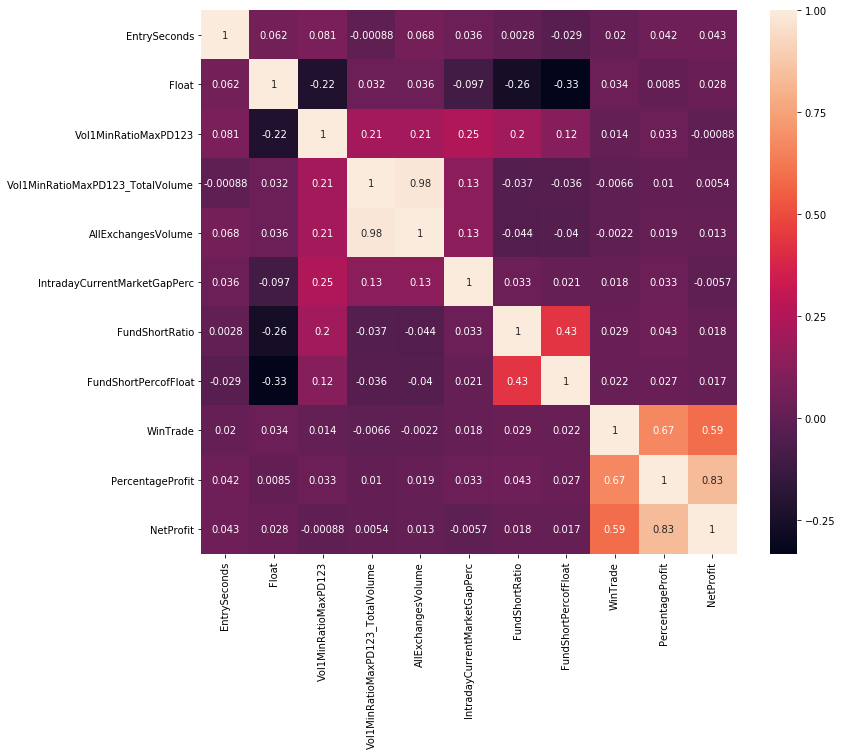

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(d2.corr(),annot=True)

In [23]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6171 entries, 10 to 58148
Data columns (total 12 columns):
EntrySeconds                        6171 non-null float64
Float                               6171 non-null int64
Vol1MinRatioMaxPD123                6171 non-null float64
Vol1MinRatioMaxPD123_TotalVolume    6171 non-null int64
AllExchangesVolume                  6171 non-null int64
IntradayCurrentMarketGapPerc        6171 non-null float64
Fund52WeekChange                    6171 non-null object
FundShortRatio                      6171 non-null float64
FundShortPercofFloat                6171 non-null float64
WinTrade                            6171 non-null int64
PercentageProfit                    6171 non-null float64
NetProfit                           6171 non-null float64
dtypes: float64(7), int64(4), object(1)
memory usage: 626.7+ KB


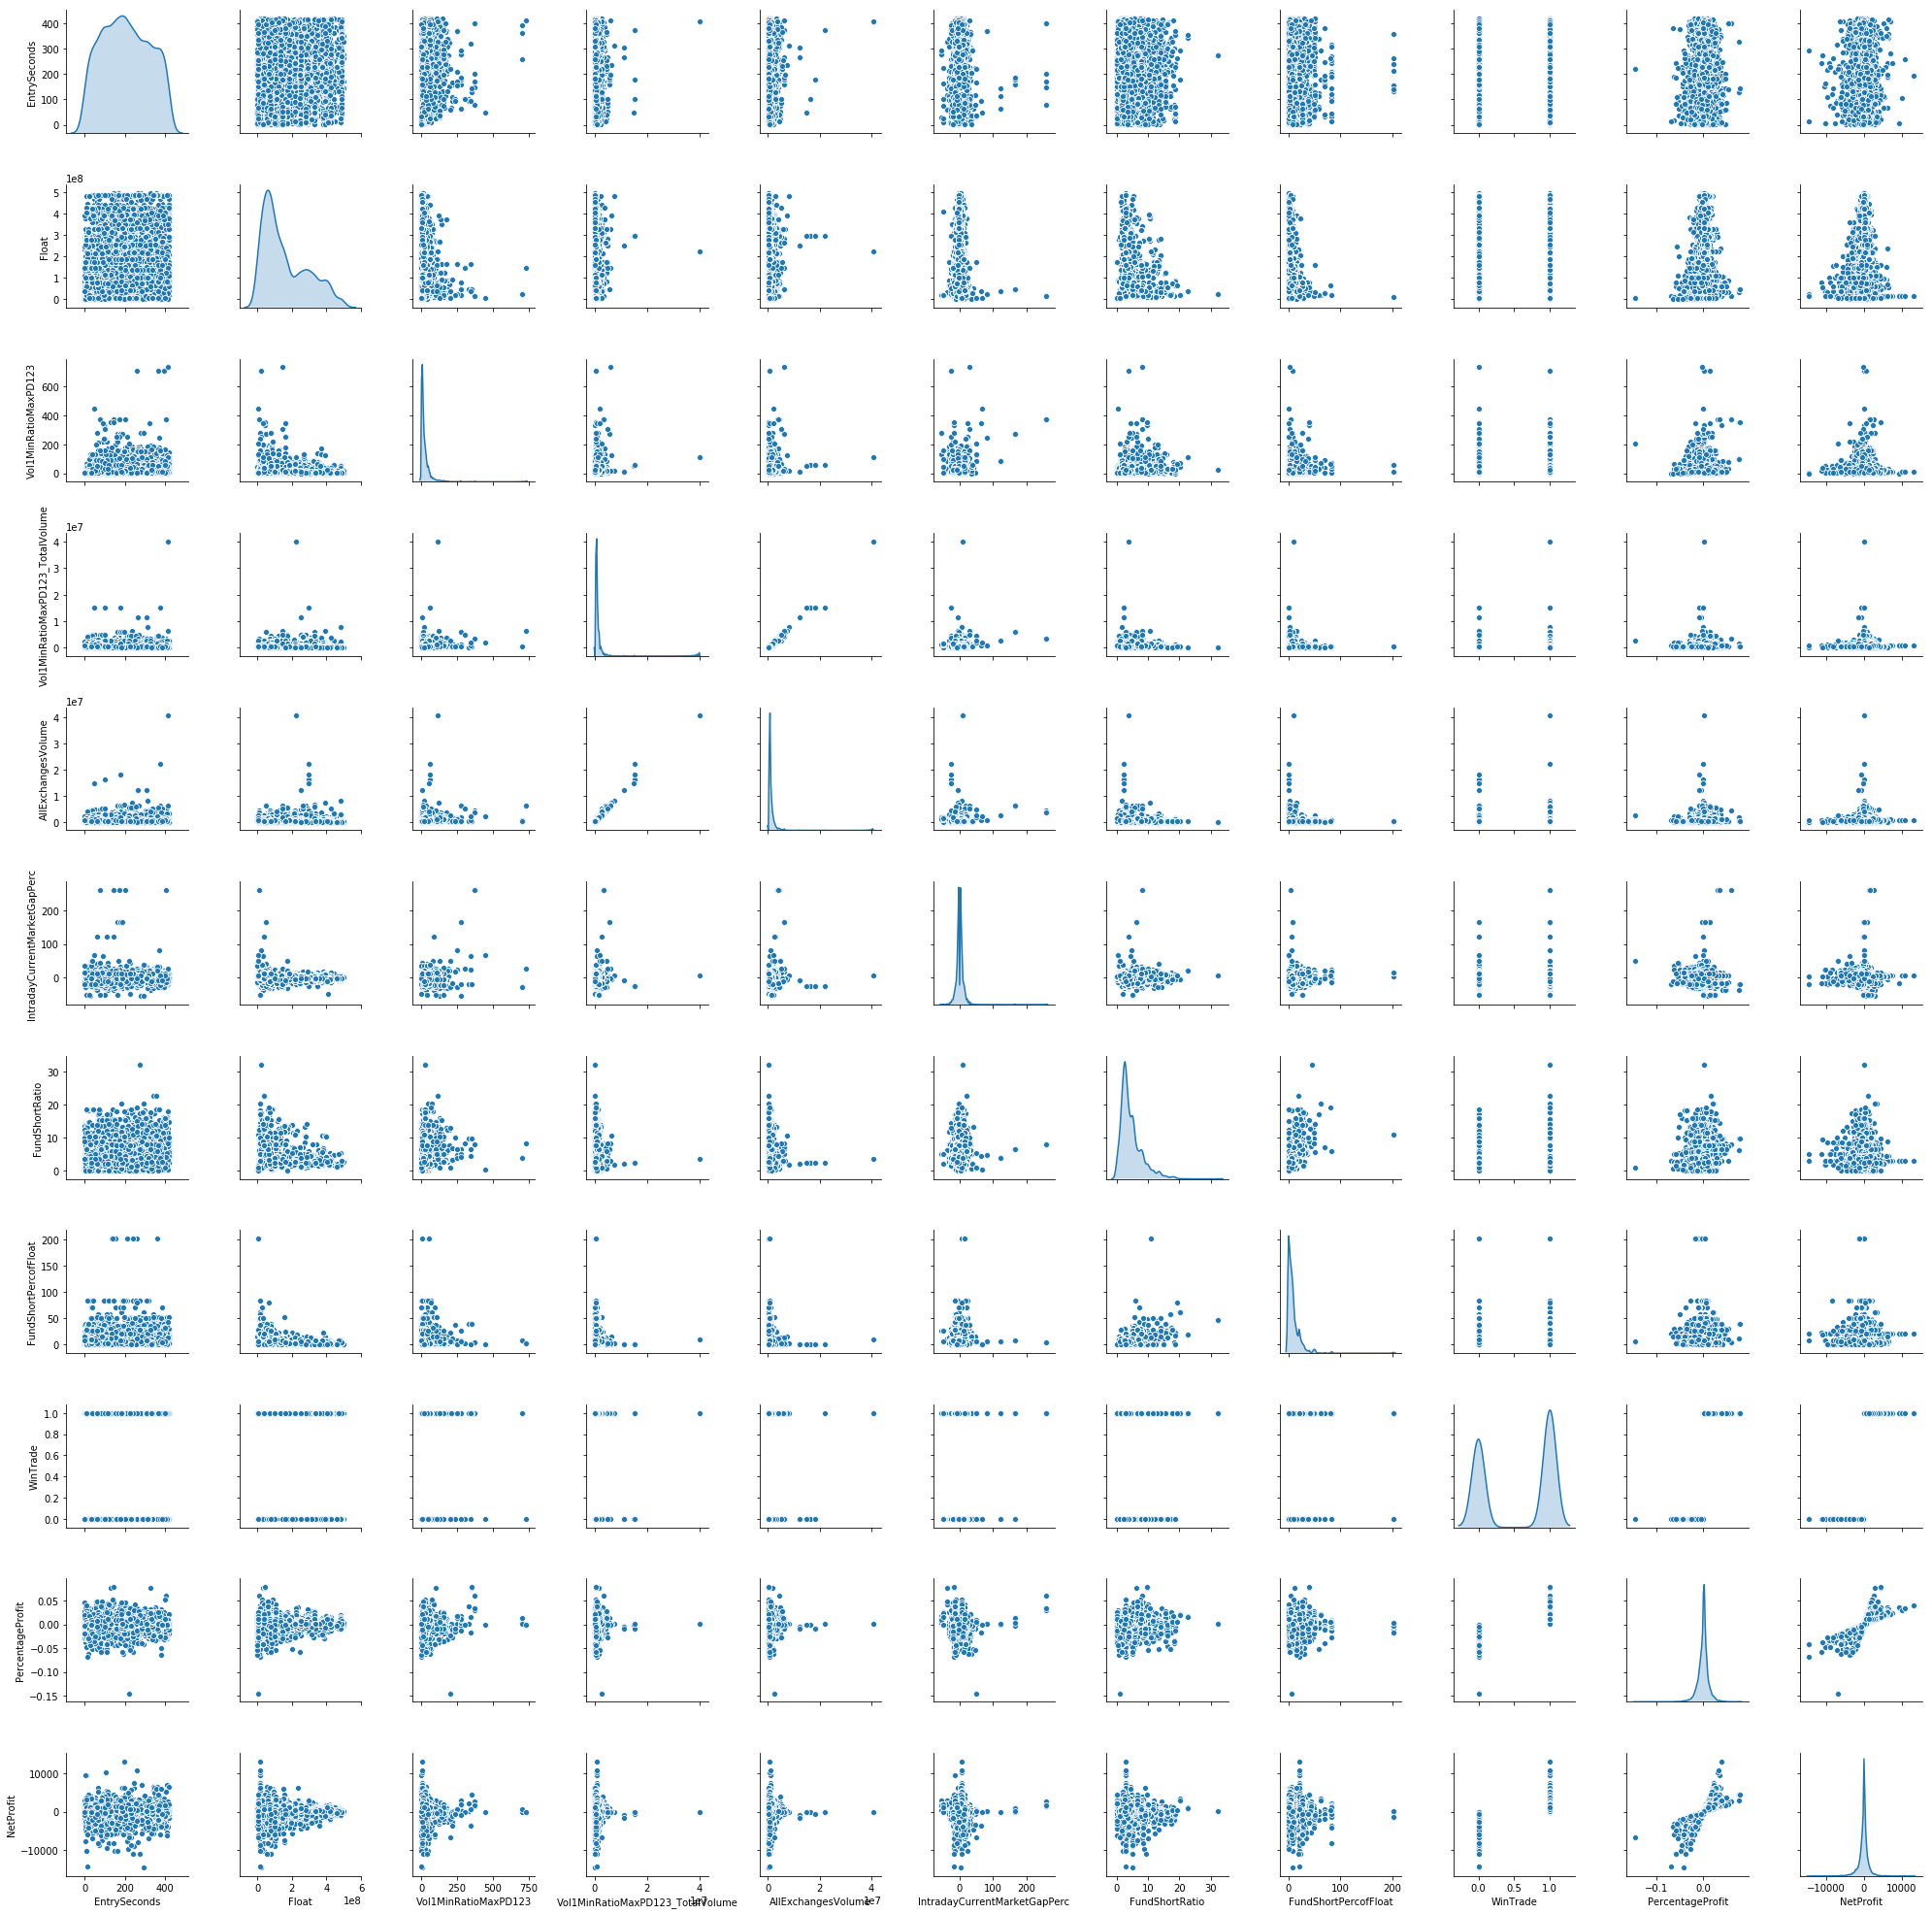

In [24]:
sns.pairplot(d2,diag_kind='kde')

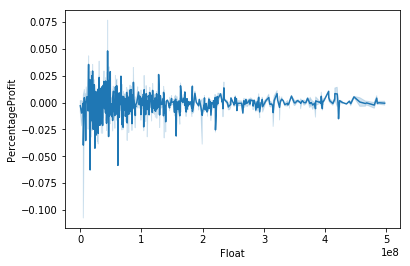

In [25]:
sns.lineplot(d2.Float,d2['PercentageProfit'])

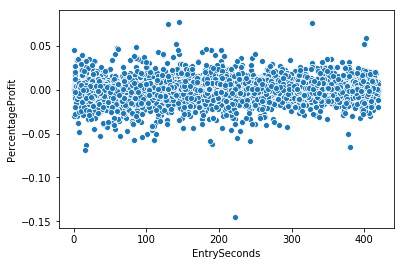

In [26]:
sns.scatterplot(d2['EntrySeconds'],d2['PercentageProfit'])

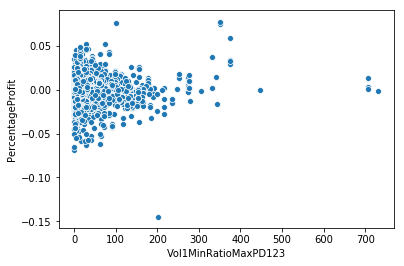

In [27]:
sns.scatterplot(d2['Vol1MinRatioMaxPD123'],d2['PercentageProfit'])

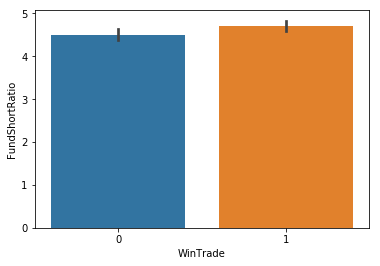

In [28]:
sns.barplot(d2.WinTrade,d2.FundShortRatio)

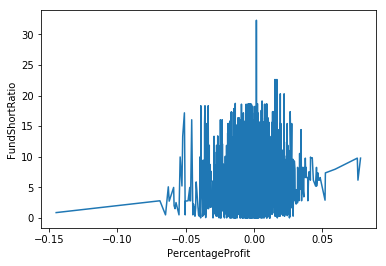

In [29]:
sns.lineplot(d2.PercentageProfit,d2.FundShortRatio)

In [30]:
round(X.shape[0]*0.6)

3703

In [31]:
len(d2.Fund52WeekChange)

6171

In [32]:
 d2.Fund52WeekChange=pd.to_numeric(d2.Fund52WeekChange.str.replace('%',''))/100

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [33]:
d2.Fund52WeekChange

10      -0.3122
11      -0.3122
14      -0.3272
16      -0.3272
31      -0.3629
32      -0.3629
36      -0.3122
37      -0.3122
39      -0.3122
40      -0.3122
41      -0.3272
46      -0.3629
47      -0.3629
96       0.5518
103      0.5518
134     -0.3595
135     -0.3595
236     -0.2182
240     -0.2182
244     -0.2182
248     -0.5946
249     -0.5946
254      0.0389
256      0.0389
301     -0.0825
348     -0.5946
349     -0.5946
363     -0.5946
377     -0.1748
378     -0.1748
          ...  
57862   -0.3697
57863   -0.3697
57864   -0.0766
57868   -0.1761
57869   -0.1761
57870    0.0855
57871    0.0855
57872    0.0855
57874    0.8767
57882    0.0000
57887   -0.3697
57889   -0.3697
57893    0.0000
57917    0.8767
57918    0.8767
57921    0.0000
57922   -0.1532
57923    1.3934
57924    1.3934
57925    0.8767
57932   -0.1532
57937    1.3934
57962    0.0855
57963    0.0855
57985   -0.3629
57988   -0.3629
57990   -0.3629
57992   -0.3629
58021   -0.0766
58148    0.4822
Name: Fund52WeekChange, 

In [34]:
X.Fund52WeekChange=d2.Fund52WeekChange

In [35]:
#d2.Fund52WeekChange=pd.Series(d)/100

In [36]:
#pd.to_numeric(re.sub('[%]', '', d2.Fund52WeekChange.iloc[0]))

In [37]:
d2.Fund52WeekChange.isnull().sum()

0

In [38]:
x_train=X.head(round(X.shape[0]*0.6))
y_train=Y.head(round(Y.shape[0]*0.6))
x_test=X.tail(round(X.shape[0]*0.4))
y_test=Y.tail(round(Y.shape[0]*0.4))

# Random Forest

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [40]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

In [41]:
RF.feature_importances_

array([0.1357596 , 0.07945894, 0.13476086, 0.12130843, 0.13583497,
       0.1404831 , 0.09266485, 0.08991955, 0.0698097 ])

Maximum Value of TopFacotrS IS O.1404 AND MINIMUM VALUE IS 0..069

Text(0.5, 0, 'Relative Importance')

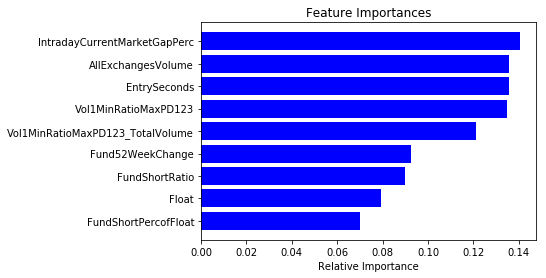

In [42]:
features=X.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Top 3 Factors is 1)IntradayCurrentMarketGapPerc 2)EntrySeconds 3)AllExchangeVolume

In [43]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.44      0.45      1048
           1       0.59      0.61      0.60      1420

   micro avg       0.54      0.54      0.54      2468
   macro avg       0.52      0.52      0.52      2468
weighted avg       0.53      0.54      0.53      2468



In [45]:
print(accuracy_score(y_test,y_pred))

0.5352512155591572


In [46]:
print(f1_score(y_test,y_pred))

0.5999302406696896


# PCA

In [64]:
from sklearn.decomposition import PCA
pca_d2 = PCA(n_components=3)
principalComponents_d2 = pca_d2.fit_transform(x_train)

In [65]:
principal_d2 = pd.DataFrame(data = principalComponents_d2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [66]:
principal_d2.tail()

,principal component 1,principal component 2,principal component 3
3698,-0.783711,0.018723,2.679032
3699,-0.783711,0.018723,2.679032
3700,-0.783711,0.018723,2.679032
3701,-1.056938,-0.150485,0.133521
3702,-1.016997,-0.057150,-0.739427


In [67]:
print('Explained variation per principal component: {}'.format(pca_d2.explained_variance_ratio_))

Explained variation per principal component: [0.24514024 0.21171065 0.13224849]


From the above output, you can observe that the principal component 1 holds 24.5% of the information while the principal component 2 holds only 21% and principal component 3 holds 13.2% of the information. Also, the other point to note is that while projecting thirty-dimensional data to a two-dimensional data, 32.5% information was lost.

# Decision Tree

In [52]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [53]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [54]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.516612641815235


# Logistic Regression

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [56]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.47      0.14      0.22      1048
           1       0.58      0.89      0.70      1420

   micro avg       0.57      0.57      0.57      2468
   macro avg       0.53      0.51      0.46      2468
weighted avg       0.54      0.57      0.50      2468

[[ 146  902]
 [ 163 1257]]
0.5684764991896273


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# KNN

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
y_pred = classifier.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred)

0.5178282009724473

#  From the above alogorithms Logistic Regression is best suitable algorithm for this datasets

# Supervised Learning-Regression 

In [61]:
import statsmodels.api   as sm
import scipy.stats       as stats
import matplotlib.pyplot as plt

In [62]:
# defining feature matrix(X) and response vector(y) 
X = d2[['IntradayCurrentMarketGapPerc','EntrySeconds','AllExchangesVolume']] 
y = d2.PercentageProfit

X = sm.add_constant(X) # Add an intercept to our model
print(X)

       const  IntradayCurrentMarketGapPerc  EntrySeconds  AllExchangesVolume
10       1.0                     -4.981164       221.107             1368764
11       1.0                     -4.981164       221.107             1368764
14       1.0                      3.370787       165.780              286883
16       1.0                      3.370787       179.857              297444
31       1.0                    -10.036630       362.263             1199885
32       1.0                    -10.036630       362.263             1199885
36       1.0                     -4.981164       305.490             1648111
37       1.0                     -4.981164       295.310             1622439
39       1.0                     -4.981164       211.162             1306272
40       1.0                     -4.981164       211.162             1306272
41       1.0                      3.370787       203.548              315421
46       1.0                    -10.036630        41.960              547762

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PercentageProfit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.023
Date:                Sun, 27 Oct 2019   Prob (F-statistic):           0.000431
Time:                        10:18:21   Log-Likelihood:                 19004.
No. Observations:                6171   AIC:                        -3.800e+04
Df Residuals:                    6167   BIC:                        -3.797e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0011      0.000     -3.595      0.000      -0.002      -0.000
IntradayCurrentMarketGapPerc  2.324e-05   9.89e-06      2.349      0.019    3.85e-06    4.26e-05
EntrySeconds                   3.87e-06   1.23e-06      3.155      0.002    1.47e-06    6.27e-06
AllExchangesVolume            1.313e-10   1.41e-10      0.934      0.350   -1.44e-10    4.07e-10
==============================================================================
Omnibus:                     1389.612   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23452.366
Skew:                          -0.623   Prob(JB):                         0.00
Kurtosis:                      12.469   Cond. No.                     2.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Optimization

In [68]:
df=d2[["EntrySeconds","AllExchangesVolume","NetProfit"]]

In [69]:
df.head()

,EntrySeconds,AllExchangesVolume,NetProfit
10,221.107,1368764,172.0
11,221.107,1368764,172.0
14,165.780,286883,18.0
16,179.857,297444,-220.0
31,362.263,1199885,-64.0


In [70]:
df.tail()

,EntrySeconds,AllExchangesVolume,NetProfit
57988,227.482,310579,668.0
57990,181.161,186427,1158.0
57992,227.482,310579,668.0
58021,61.722,405460,-610.0
58148,331.623,231168,1270.0


In [71]:
# Python Program to Convert seconds 
# into hours, minutes and seconds 
  
def convert(seconds): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%d:%02d" % (hour, minutes) 

In [72]:
#for loop
A=[]
for i in df.EntrySeconds:
    A.append(convert(i))

In [73]:
A

['0:03',
 '0:03',
 '0:02',
 '0:02',
 '0:06',
 '0:06',
 '0:05',
 '0:04',
 '0:03',
 '0:03',
 '0:03',
 '0:00',
 '0:00',
 '0:00',
 '0:00',
 '0:06',
 '0:06',
 '0:04',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:06',
 '0:00',
 '0:01',
 '0:01',
 '0:06',
 '0:06',
 '0:04',
 '0:04',
 '0:04',
 '0:04',
 '0:04',
 '0:03',
 '0:03',
 '0:02',
 '0:02',
 '0:02',
 '0:04',
 '0:05',
 '0:06',
 '0:06',
 '0:03',
 '0:01',
 '0:06',
 '0:06',
 '0:03',
 '0:05',
 '0:03',
 '0:04',
 '0:05',
 '0:04',
 '0:04',
 '0:04',
 '0:03',
 '0:03',
 '0:04',
 '0:02',
 '0:01',
 '0:06',
 '0:03',
 '0:01',
 '0:01',
 '0:05',
 '0:02',
 '0:02',
 '0:03',
 '0:06',
 '0:01',
 '0:01',
 '0:01',
 '0:01',
 '0:00',
 '0:02',
 '0:02',
 '0:01',
 '0:02',
 '0:03',
 '0:00',
 '0:01',
 '0:05',
 '0:01',
 '0:01',
 '0:00',
 '0:02',
 '0:03',
 '0:02',
 '0:04',
 '0:06',
 '0:03',
 '0:03',
 '0:03',
 '0:00',
 '0:03',
 '0:00',
 '0:00',
 '0:02',
 '0:02',
 '0:02',
 '0:02',
 '0:00',
 '0:01',
 '0:01',
 '0:02',
 '0:04',
 '0:01',
 '0:01',
 '0:01',
 '0:04',
 

In [74]:
df["new"]=pd.Series(A)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
df.head()

,EntrySeconds,AllExchangesVolume,NetProfit,new
10,221.107,1368764,172.0,0:03
11,221.107,1368764,172.0,0:00
14,165.780,286883,18.0,0:00
16,179.857,297444,-220.0,0:06
31,362.263,1199885,-64.0,0:04


In [76]:
df2=df.NetProfit.groupby(df.new).sum()

In [77]:
df2

new
0:00     7010.0
0:01     1484.0
0:02    -7636.0
0:03     -714.0
0:04   -26600.0
0:05   -15798.0
0:06    -4942.0
Name: NetProfit, dtype: float64

In [78]:
df4=df2[df2==max(df2)]
df4

new
0:00    7010.0
Name: NetProfit, dtype: float64

In [88]:
df4=df2[df2==min(df2)]
df4

new
0:04   -26600.0
Name: NetProfit, dtype: float64

In [84]:
z=df4.index[0]

In [85]:
final=df[df["new"]==z]

In [86]:
final.to_csv("Trades_Calculation_0m-12m_Results.csv")

In [87]:
final

,EntrySeconds,AllExchangesVolume,NetProfit,new
31,362.263,1199885,-64.0,0:04
32,362.263,1199885,-64.0,0:04
40,211.162,1306272,204.0,0:04
254,176.969,155511,2046.0,0:04
428,412.076,161762,-2490.0,0:04
506,300.121,247028,-900.0,0:04
527,260.496,443542,110.0,0:04
610,222.149,748291,-3184.0,0:04
645,136.109,297614,30.0,0:04
655,344.957,910181,440.0,0:04


# Visualizing and Animating Optimization Algorithms with Matplotlib

In [89]:
%matplotlib inline

In [90]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

We shall restrict our attention to 3-dimensional problems for right now (i.e. optimizing over only 2 parameters), though what follows can be extended to higher dimensions by plotting all pairs of parameters against each other, effectively projecting the problem to 3-dimensions.
The Wikipedia article on Test functions for optimization has a few functions that are useful for evaluating optimization algorithms. In particular, we shall look at Beale's function:
f(x,y)=(1.5−x+xy)2+(2.25−x+xy2)2+(2.625−x+xy3)2

In [91]:
x=final["EntrySeconds"]
y=final["NetProfit"]

In [92]:
f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [93]:
xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2

In [94]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

In [95]:
z = f(x, y)

We know the global minima is at (3,0.5)

In [96]:
minima = np.array([3., .5])

In [97]:
f(*minima)

0.0

In [98]:
minima_ = minima.reshape(-1, 1)
minima

array([3. , 0.5])

In [99]:
f(*minima_)

array([0.])

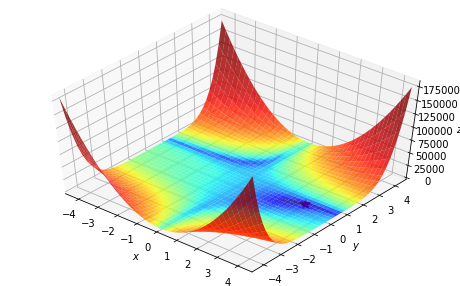

In [100]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

2D Contour Plot and Gradient Vector Field¶ We use autograd to compute the gradient vector field, and plot it with Matplotlib's quiver method

In [101]:
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

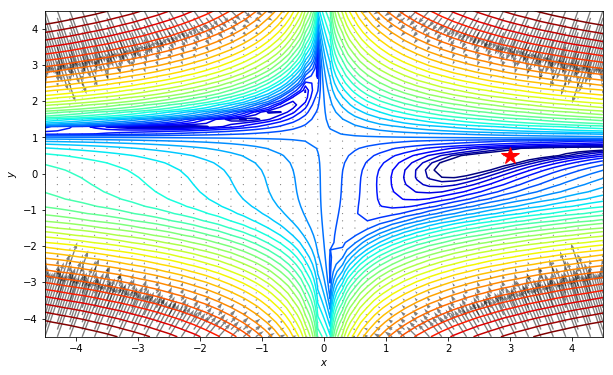

In [102]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

Gradient-based Optimization For the purposes of this demonstration, we use SciPy's optimization methods. It goes without saying that the code and patterns for producing these visualizations generalizes easily to other optimization tools and libraries.
We set the starting point as (3,4) , since it is challenging for algorithms with a little too much momentum in the gradient descent update rule, as they may overshoot and end up in some local minima.

In [103]:
x0 = np.array([3., 4.])

Again, we use autograd to compute the gradients, and augment the function slightly to adhere to Scipy's optimization interface

In [104]:
func = value_and_grad(lambda args: f(*args))

The method we use first is Newton-CG, and set the callback simply as print. Note that we can only do this in Python 3, where print is an actual function.

In [105]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=print)

[2.71113991 3.35161828]
[2.48008912 2.78955116]
[2.29965866 2.30123678]
[2.16373347 1.8756312 ]
[2.06741079 1.50235414]
[2.00766238 1.17079384]
[1.98485905 0.86972447]
[2.00511126 0.59071489]
[2.07692544 0.34891823]
[2.17857778 0.21644485]
[2.55966682 0.38003383]
[2.80228089 0.44954972]
[2.94477854 0.48765376]
[2.94564749 0.48601427]
[2.95359059 0.48810805]
[2.97113927 0.49269804]
[2.99870879 0.49976069]
[2.99999481 0.49999876]
[3.00000001 0.49999999]
[3.  0.5]
[3.  0.5]


In [106]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'nfev': 22,
 'njev': 104,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 21}

The results look plausibly good, but would be more convincing with some visualization. Let us define a new callback function that appends the intermediate values to a list instead of simply printing it.

In [107]:
def make_minimize_cb(path=[]):
    
    def minimize_cb(xk):
        # note that we make a deep copy of xk
        path.append(np.copy(xk))

    return minimize_cb

In [108]:
path_ = [x0]

In [109]:
res = minimize(func, x0=x0, method='Newton-CG',
               jac=True, tol=1e-20, callback=make_minimize_cb(path_))

In [110]:
dict(res)

{'fun': 2.5770606809684326e-18,
 'jac': array([8.13600382e-10, 1.86117137e-09]),
 'nfev': 22,
 'njev': 104,
 'nhev': 0,
 'status': 0,
 'success': True,
 'message': 'Optimization terminated successfully.',
 'x': array([3. , 0.5]),
 'nit': 21}

In [111]:
path = np.array(path_).T
path.shape

(2, 22)

(-4.5, 4.5)

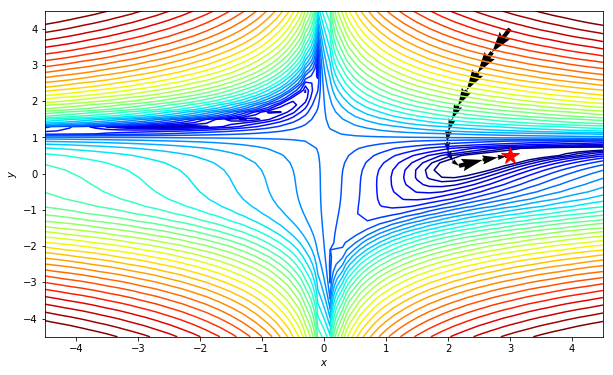

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

(-4.5, 4.5)

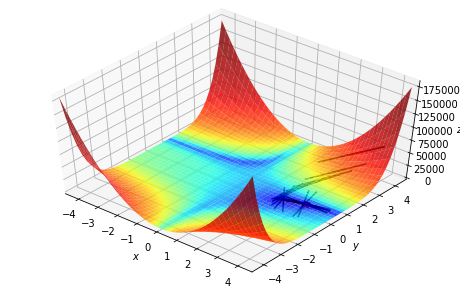

In [113]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], f(*path[::,:-1]), 
          path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], f(*(path[::,1:]-path[::,:-1])), 
          color='k')
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

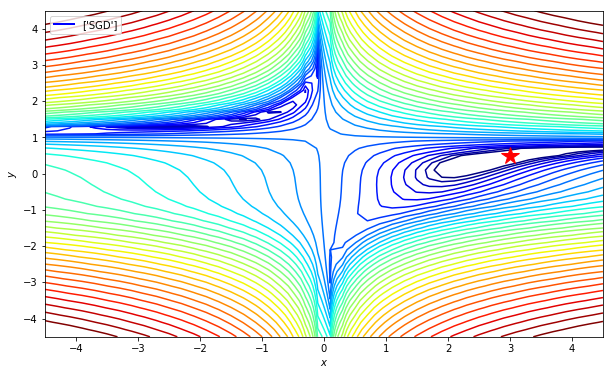

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=18)

line, = ax.plot([], [], 'b', label=['SGD'], lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

ax.legend(loc='upper left')

In [115]:
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

In [116]:
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

We define the total number of frames to be the total number of steps taken in the optimization and using blitting so as to only redraw the parts of the animation that have changed.

In [117]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

Modularizing and Generalizing to Animate Multiple Paths Simultaneously Instead of initializing the line and point in the global scope, and defining the animation callback functions to use those global variables, we can encapsulate everything in a closure.
Or better yet, we could just create subclass of FuncAnimation that is initialized with a variable number of paths to plot. In the initialization method, we just create and save the list of Line2D objects as attributes, and define animation callback methods that use these attributes.

In [118]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [119]:
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

In [120]:
methods = [
    "SGD",
    "Momentum",
    "NAG",
    "Adagrad",
    "Adadelta",
    "Rmsprop"
]

In [121]:
minimize_ = partial(minimize, fun=func, x0=x0, jac=True, bounds=[(xmin, xmax), (ymin, ymax)], tol=1e-20)

In [122]:
paths_ = defaultdict(list)
for method in methods:
    paths_[method].append(x0)

In [123]:
paths = [np.array(paths_[method]).T for method in methods]

In [124]:
zpaths = [f(*path) for path in paths]

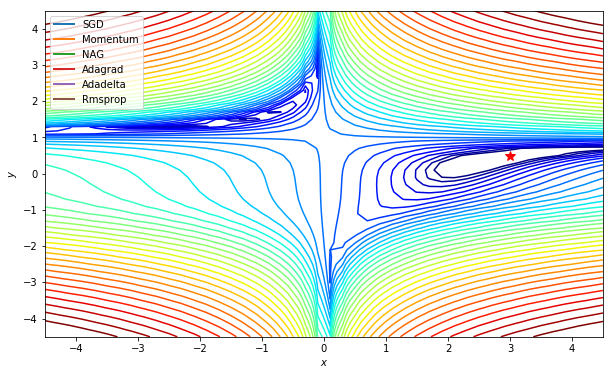

In [125]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.plot(*minima_, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths, labels=methods, ax=ax)

ax.legend(loc='upper left')